# Roller Coaster Project

 Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

 Roller coasters are often split into two main categories based on their construction material: wood or steel. 
 
 Rankings for the best wood and steel roller coasters from the 2013 to 2018 Golden Ticket Awards are provided in 'Golden_Ticket_Award_Winners_Wood.csv' and 'Golden_Ticket_Award_Winners_Steel.csv', respectively.


## Load rankings data

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_steel.csv')

print(wood.head())
print(steel.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  
   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, 

## Inspect data

First of all we need to inspect the dataframe and gain familarities with the data by answering some simple questions.

How many roller coasters are included in each ranking dataset? How many different roller coaster suppliers are included in the rankings? Do some years include more rankings than other years?

If you have a favorite amusement park or there is one near where you live, subset one of the DataFrames on your chosen park. Are there any ranked roller coasters there?

In [3]:
wood_supplier_unique = wood.Supplier.nunique()
print(wood_supplier_unique)
print(steel.Supplier.nunique())

print(wood.groupby('Year of Rank'). Rank.count().reset_index())

coaster_ranking = wood[(wood.Name == 'El Toro') & (wood.Park == 'Six Flags Great Adventure')]
print(coaster_ranking)

32
15
   Year of Rank  Rank
0          2013    10
1          2014    10
2          2015    10
3          2016    50
4          2017    50
5          2018    50
     Rank     Name                       Park       Location Supplier  \
1       2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
11      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
21      2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
32      3  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
80      1  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   
131     2  El Toro  Six Flags Great Adventure  Jackson, N.J.  Intamin   

     Year Built  Points  Year of Rank  
1          2006    1302          2013  
11         2006    1291          2014  
21         2006    1464          2015  
32         2006    1121          2016  
80         2009    1241          2017  
131        2006    1197          2018  



## Function to plot rankings over time for 1 roller coaster.

 This Function will plot the ranking of a given roller coaster over time as a line.

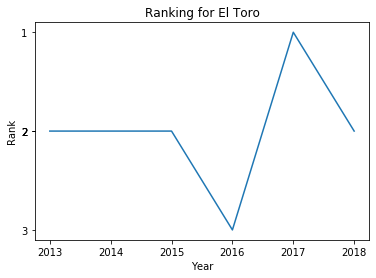

<Figure size 432x288 with 0 Axes>

In [7]:
def plotrankingovertime(df, name, park):
  coaster_ranking = df[(df.Name == name) & (df.Park == park)]
  fig, ax = plt.subplots()
  ax.plot(coaster_ranking['Year of Rank'], coaster_ranking.Rank)
  ax.set_xticks(coaster_ranking['Year of Rank'].values)
  ax.set_yticks(coaster_ranking['Rank'].values)
  ax.invert_yaxis()
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('Ranking for ' + str(name))
  plt.show()

# Create a plot of El Toro ranking over time
plotrankingovertime(wood, 'El Toro', 'Six Flags Great Adventure')
plt.clf()

Since “El Toro” is not a unique roller coaster name, the plot generated by this function will show multiple rankings for a given year. To fix this issue, we added an additional argument park to our function that allows us to differentiate between roller coasters of the same name at different amusement parks.

## Function to plot rankings over time for 2 roller coasters.

This function will plot the ranking of two given roller coasters over time as lines.

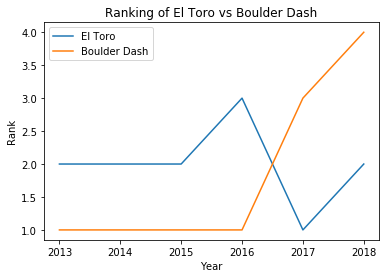

<Figure size 432x288 with 0 Axes>

In [8]:
def plotrankingoftwo(df, name1, park1, name2, park2):
  coaster_ranking1 = df[(df['Name'] == name1) & (df['Park'] == park1)]
  coaster_ranking2 = df[(df['Name'] == name2) & (df['Park'] == park2)]
  fig, ax = plt.subplots()
  ax.plot(coaster_ranking1['Year of Rank'], coaster_ranking1.Rank, label= name1)
  ax.plot(coaster_ranking2['Year of Rank'], coaster_ranking2.Rank, label=name2)
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.legend()
  plt.title('Ranking of {} vs {}'.format(name1, name2))
  plt.show()

# Create a plot of El Toro and Boulder dash hurricanes

plotrankingoftwo(wood, 'El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce')
plt.clf()

## Function to plot top n rankings over time.

This function will plot the ranking of the top n ranked roller coasters over time as lines.


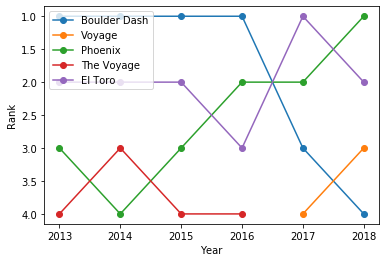

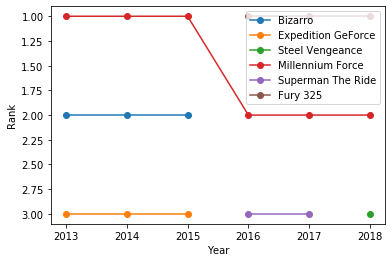

<Figure size 432x288 with 0 Axes>

In [9]:
def plottopnranked(df, n):
  top_n_ranked = df[df.Rank <= n]
  fig, ax = plt.subplots()
  for coaster in set(top_n_ranked['Name']):
    coaster_ranking = top_n_ranked[top_n_ranked['Name'] == coaster]
    ax.plot(coaster_ranking['Year of Rank'], coaster_ranking['Rank'], label=coaster, marker='o')
  ax.invert_yaxis()
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.legend()
  return plt.show()
   
plottopnranked(wood, 4)
plottopnranked(steel, 3)
plt.clf()

Now that you’ve visualized rankings over time, let’s dive into the actual statistics of roller coasters themselves. Captain Coaster is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in roller_coasters.csv. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.



## Load roller coaster data


In [10]:
coasters_df = pd.read_csv('roller_coasters.csv')
print(coasters_df.head())


            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  


## Create a function to plot histogram of column values

This function plots a histogram of any numeric column of the roller coaster DataFrame.

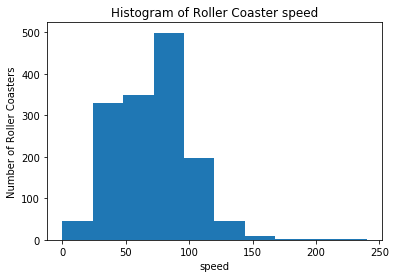

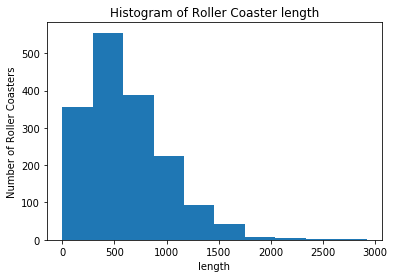

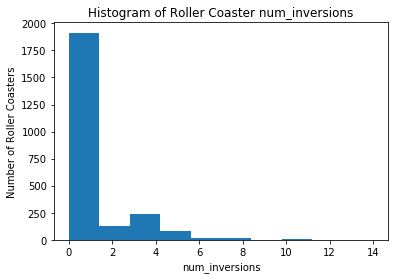

<Figure size 432x288 with 0 Axes>

In [11]:
def plot_histogram(df, column):
  plt.hist(df[column].dropna())
  plt.xlabel(column)
  plt.ylabel('Number of Roller Coasters')
  plt.title('Histogram of Roller Coaster {}'.format(column))
  plt.show()

# Create histogram of roller coaster speed
plot_histogram(coasters_df, 'speed')
plt.clf()
# Create histogram of roller coaster length
plot_histogram(coasters_df, 'length')
plt.clf()
# Create histogram of roller coaster number of inversions
plot_histogram(coasters_df, 'num_inversions')
plt.clf()

Plotting a histogram of “height” is tricky since there are some outliers that skew the data. We also made a separate function that creates a histogram of height and used the following code to remove the outliers.

  heights = df[df['height'] <= 140]
  
With the outliers removed, we could plot the histogram and better visualize the distribution of heights.

## Create a function to plot histogram of height values.


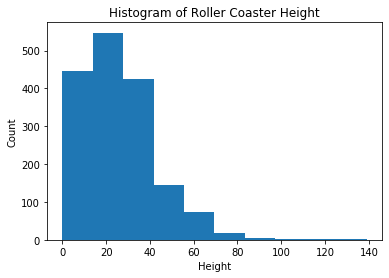

<Figure size 432x288 with 0 Axes>

In [13]:
def plot_height_histogram(df):
  heights = df[df['height'] <= 140]['height'].dropna()
  plt.hist(heights)
  plt.title('Histogram of Roller Coaster Height')
  plt.xlabel('Height')
  plt.ylabel('Count')
  plt.show()

 # Create a histogram of coasters_df height

plot_height_histogram(coasters_df)
plt.clf()

## Create a function to plot inversions by coaster at park.

This function creates a bar chart showing the number of inversions for each roller coaster at an amusement park.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


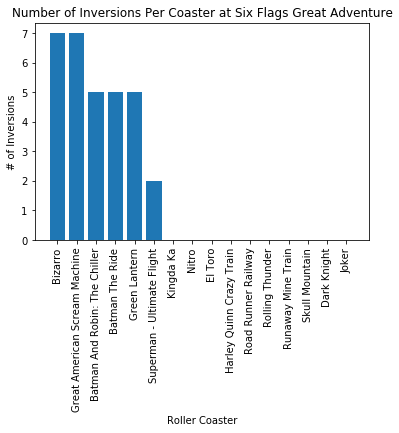

<Figure size 432x288 with 0 Axes>

In [16]:
def plot_inversions_by_coaster(df, park_name):
  park_coasters = df[df['park'] == park_name]
  park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
  coaster_names = park_coasters['name']
  number_inversions = park_coasters['num_inversions']
  plt.bar(range(len(number_inversions)),number_inversions)
  ax = plt.subplot()
  ax.set_xticks(range(len(coaster_names)))
  ax.set_xticklabels(coaster_names,rotation=90)
  plt.title('Number of Inversions Per Coaster at {}'.format(park_name))
  plt.xlabel('Roller Coaster')
  plt.ylabel('# of Inversions')
  plt.show()

# Create barplot of inversions by roller coasters

plot_inversions_by_coaster(coasters_df, 'Six Flags Great Adventure')
plt.clf()

## Function to plot a pie chart of status.operating.


This function creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely').

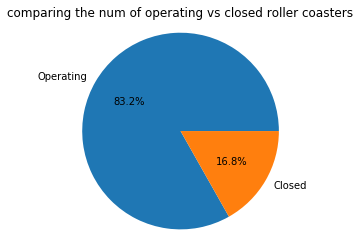

<Figure size 432x288 with 0 Axes>

In [17]:
def pie_chart_status(coaster_df):
  operating_coasters = coaster_df[coaster_df['status'] == 'status.operating']
  closed_coasters = coaster_df[coaster_df['status'] == 'status.closed.definitely']
  num_operating_coasters = len(operating_coasters)
  num_closed_coasters = len(closed_coasters)
  status_counts = [num_operating_coasters,num_closed_coasters]
  plt.pie(status_counts,autopct='%0.1f%%',labels=['Operating','Closed'])
  plt.axis('equal')
  plt.title('comparing the num of operating vs closed roller coasters')
  plt.show()

# Create pie chart of roller coasters
pie_chart_status(coasters_df)
plt.clf()

## Function to plot scatter of any two columns.


This function creates a scatter plot of two numeric columns of the roller coaster DataFrame.

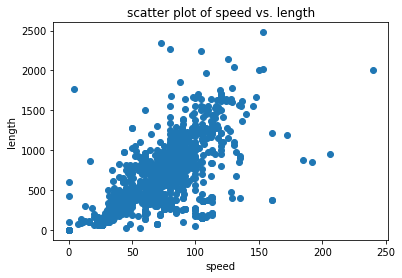

<Figure size 432x288 with 0 Axes>

In [18]:
def scattertwocolumns(df, column1, column2):
  plt.scatter(df[column1], df[column2])
  plt.title('scatter plot of {} vs. {}'.format(column1, column2))
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.show()

scattertwocolumns(coasters_df, 'speed', 'length')
plt.clf()

## Function to plot scatter of speed vs height.


Plotting a scatter plot of “speed” vs “height” is tricky since there are some outliers that skew the data. We also made a separate function that specifically creates a scatter plot of “speed” vs “height” and used the following code to remove the “height” outliers.

coaster_df = coaster_df[coaster_df['height'] < 140]

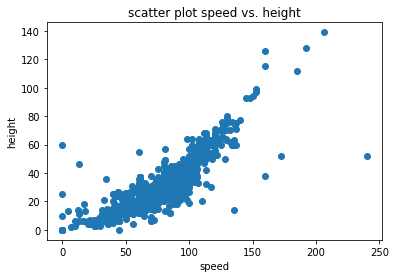

<Figure size 432x288 with 0 Axes>

In [19]:
def scatter_speed_height(df):
  coaster_sh = df[df['height'] < 140]
  plt.scatter(coaster_sh['speed'], coaster_sh['height'])
  plt.title('scatter plot speed vs. height')
  plt.xlabel('speed')
  plt.ylabel('height')
  plt.show()

# Create a scatter plot of roller coaster height by speed
scatter_speed_height(coasters_df)
plt.clf()

## Answering some questions.

### 1.What roller coaster seating type is most popular? 

In [20]:
seatings = coasters_df['seating_type'].value_counts().reset_index()
print(seatings)

            index  seating_type
0        Sit Down          2217
1        Spinning           150
2        Inverted           122
3       Suspended            55
4          Alpine            43
5              na            40
6   Water Coaster            29
7          Flying            27
8       Floorless            27
9       Motorbike            21
10       Stand Up            20
11  4th Dimension            18
12           Wing            17
13      Bobsleigh            11
14       Pipeline             5


#### Function to plot a pie chart of seating type popularity.

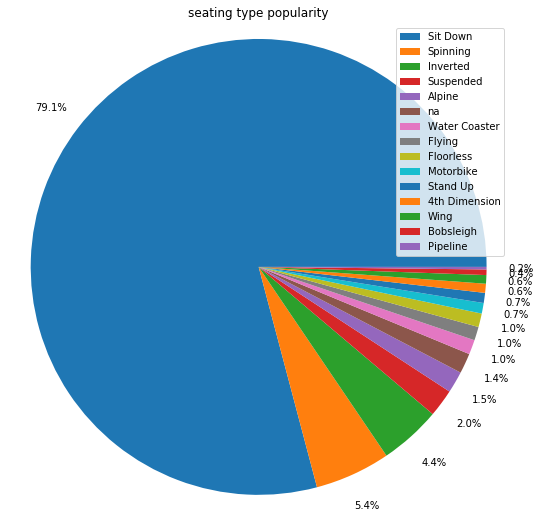

<Figure size 432x288 with 0 Axes>

In [34]:
def pieplotseatingtype(df):
  seating = df['seating_type'].value_counts().reset_index()
  ax = plt.subplots(figsize=(9, 9))
  plt.pie(seating['seating_type'], autopct='%0.1f%%', pctdistance=1.15)
  plt.title('seating type popularity')
  plt.axis('equal')
  plt.legend(seating['index'].values, loc=1)
  plt.show()

pieplotseatingtype(coasters_df)
plt.clf()

### 2.Do different seating types result in higher/faster/longer roller coasters?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


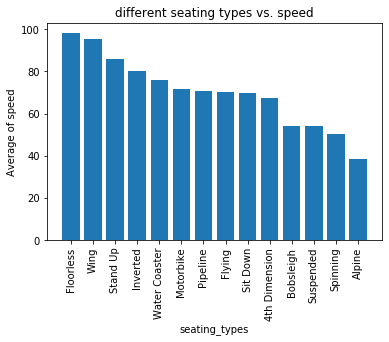

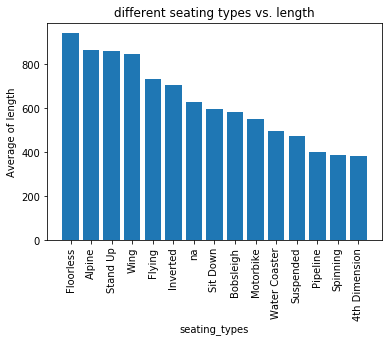

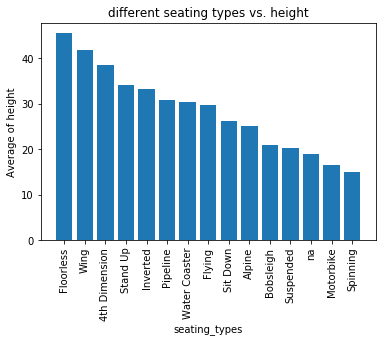

<Figure size 432x288 with 0 Axes>

In [25]:
def barplot_seatingfeature(df, column):
  seating_feature = df.groupby('seating_type')[column].mean().sort_values(ascending=False).dropna().reset_index()
  plt.bar(range(len(seating_feature[column])), seating_feature[column])
  ax = plt.subplot()
  ax.set_xticks(range(len(seating_feature[column])))
  ax.set_xticklabels(seating_feature['seating_type'].values, rotation=90)
  plt.xlabel('seating_types')
  plt.ylabel('Average of {}'.format(column))
  plt.title('different seating types vs. {}'.format(column))
  plt.show()

barplot_seatingfeature(coasters_df, 'speed')
plt.clf()
barplot_seatingfeature(coasters_df, 'length')
plt.clf()
barplot_seatingfeature(coasters_df, 'height')
plt.clf()


### 3.Do roller coaster manufacturers have any specialties (do they focus on speed, height, seating type, or inversions)?

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


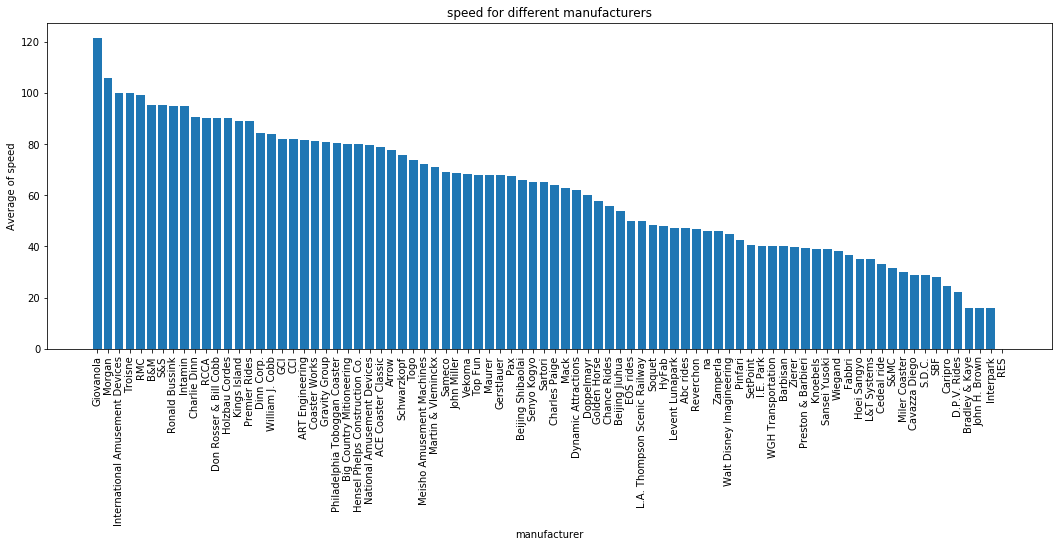

<Figure size 432x288 with 0 Axes>

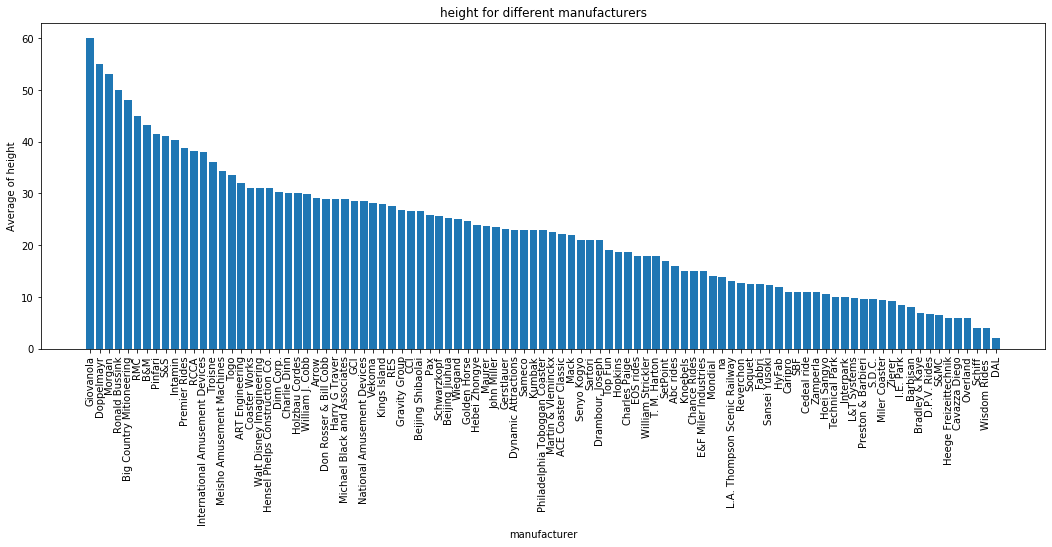

<Figure size 432x288 with 0 Axes>

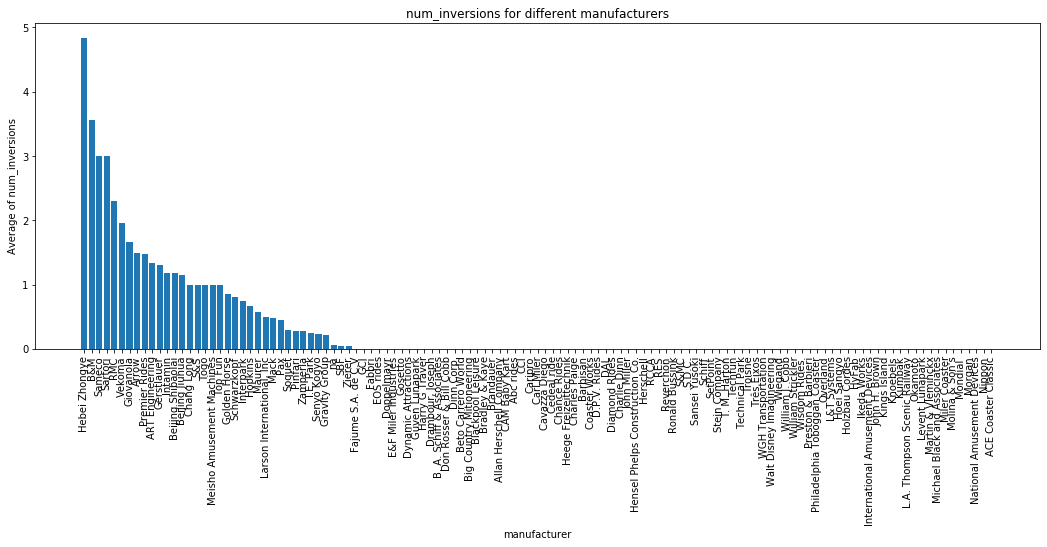

<Figure size 432x288 with 0 Axes>

In [42]:
def barplot_manufacturer(df, column):
  manufact_df = df.groupby('manufacturer')[column].mean().sort_values(ascending=False).dropna().reset_index()
  plt.figure(figsize=(18,6))
  plt.bar(range(len(manufact_df[column])), manufact_df[column])
  ax = plt.subplot()
  ax.set_xticks(range(len(manufact_df[column])))
  ax.set_xticklabels(manufact_df['manufacturer'].values, rotation=90)
  plt.xlabel('manufacturer')
  plt.ylabel('Average of {}'.format(column))
  plt.title('{} for different manufacturers'.format(column))
  plt.show()

barplot_manufacturer(coasters_df, 'speed')
plt.clf()
barplot_manufacturer(coasters_df, 'height')
plt.clf()
barplot_manufacturer(coasters_df, 'num_inversions')
plt.clf()

### It was a fun project.